# Bonus

You must train a model that predicts `charges` with an R2 Score of 0.85 or above. 

<details>
<summary> 💡 Hint </summary>

\
Machine Learning algorithms are sensitive to the scale of features. They will attribute more importance to large scale features, which can negatively impacted their performance.

</details>



In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

df.head()

/Users/benjaminauzanneau/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


In [10]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(df[['age','bmi','smoker']], df['charges'])

KNeighborsRegressor(n_neighbors=1)

In [12]:
neigh.kneighbors([[50,50,False]],n_neighbors=1338)

(array([[ 3.01788005,  3.81608438,  3.89235147, ..., 44.92828063,
         45.77055931, 46.71960616]]),
 array([[1088,  438,  401, ...,  410,  250,  172]]))

In [11]:
len(df)

1338

In [13]:
df.iloc[172]

age                18
sex              male
bmi             15.96
children            0
smoker          False
region      northeast
charges        1694.8
Name: 172, dtype: object

In [141]:
from sklearn.preprocessing import MinMaxScaler

# Scale age
age_scaler = MinMaxScaler().fit(df[['age']])
df['age_scaled'] = age_scaler.transform(df[['age']])

# Scale bmi
bmi_scaler = MinMaxScaler().fit(df[['bmi']])
df['bmi_scaled'] = bmi_scaler.transform(df[['bmi']])

df.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,age_scaled,bmi_scaled
0,19,female,27.900,0,True,southwest,16884.92400,0,0.021739,0.321227
1,18,male,33.770,1,False,southeast,1725.55230,1,0.000000,0.479150
2,28,male,33.000,3,False,southeast,4449.46200,1,0.217391,0.458434
3,33,male,22.705,0,False,northwest,21984.47061,1,0.326087,0.181464
4,32,male,28.880,0,False,northwest,3866.85520,1,0.304348,0.347592


In [144]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare X and y
X = df[['smoker',
        'age_scaled',
        'bmi_scaled']].to_numpy()

y = df['charges'].to_numpy()

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

# Instanciate the model
knn_model = KNeighborsRegressor(n_neighbors=10)

# Train the model on the scaled Training data
knn_model.fit(X_train, y_train)

# Score the model on the scaled Testing data
knn_model.score(X_test,y_test)


0.8555477195167871

In [131]:
score = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    knn_model.fit(X_train, y_train)

    # Append the score 
    score.append(knn_model.score(X_test,y_test))
    

Text(0, 0.5, 'Error Rate')

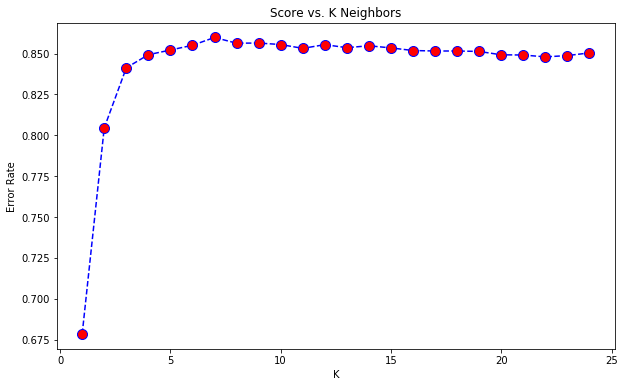

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. K Neighbors')
plt.xlabel('K')
plt.ylabel('Error Rate')

# 🏁